In [1]:
import networkx as nx
import cirq
import matplotlib.pyplot as plt
import math

In [2]:
def qaoa_generator(gamma:list[float],beta:list[float],N:int,seed:int=None):
    G = nx.random_regular_graph(3,N,seed)
    
    # Draw the graph
    plt.figure(figsize=(4, 3))
    nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1000, font_size=15)
    plt.title("Graph Plot")
    plt.show()

    qubits = {i:cirq.LineQubit(i) for i,_ in enumerate(G.nodes)}
    circuit = cirq.Circuit()
    for q in qubits.values():
        circuit.append(cirq.H(q))
    for g,b in zip(gamma,beta):
        for e in G.edges:
            circuit.append(cirq.CZ(qubits[e[0]],qubits[e[1]])**g)
        for q in qubits.values():
            circuit.append(cirq.X(q)**b)
    return circuit

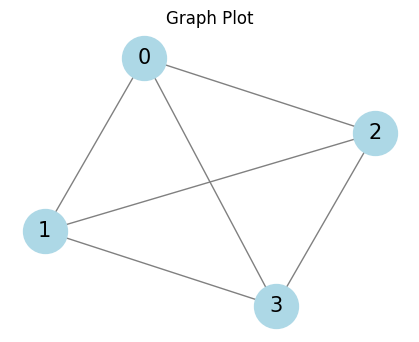

0: ───H───@─────────@─────────@─────────X^0.177───────────────────────@─────────@─────────@─────────X^0.093─────────────────────────────────
          │         │         │                                       │         │         │
1: ───H───@^0.155───┼─────────┼─────────@─────────@─────────X^0.177───@^(2/7)───┼─────────┼─────────@─────────@─────────X^0.093─────────────
                    │         │         │         │                             │         │         │         │
2: ───H─────────────┼─────────@^0.155───@^0.155───┼─────────@─────────X^0.177───┼─────────@^(2/7)───@^(2/7)───┼─────────@─────────X^0.093───
                    │                             │         │                   │                             │         │
3: ───H─────────────@^0.155───────────────────────@^0.155───@^0.155───X^0.177───@^(2/7)───────────────────────@^(2/7)───@^(2/7)───X^0.093───

In [3]:
gamma = [0.4877097327098487/math.pi, 0.8979876956225422/math.pi]
beta = [0.5550603400685824/math.pi, 0.29250781484335187/math.pi]

qaoa_generator(gamma,beta,4,1)